In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn import metrics
from sklearn.model_selection import cross_val_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

evaluation = pd.DataFrame({'Model': [],
                           'Details':[],
                           'Root Mean Squared Error (RMSE)':[],
                           'R-squared (training)':[],
                           'Adjusted R-squared (training)':[],
                           'R-squared (test)':[],
                           'Adjusted R-squared (test)':[],
                           '5-Fold Cross Validation':[]})

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.base import TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import PolynomialFeatures

- cap-shape: bell=b,conical=c,convex=x,flat=f, knobbed=k,sunken=s
- cap-surface: fibrous=f,grooves=g,scaly=y,smooth=s
- cap-color: brown=n,buff=b,cinnamon=c,gray=g,green=r,pink=p,purple=u,red=e,white=w,yellow=y
- bruises: bruises=t,no=f
- odor: almond=a,anise=l,creosote=c,fishy=y,foul=f,musty=m,none=n,pungent=p,spicy=s
- gill-attachment: attached=a,descending=d,free=f,notched=n
- gill-spacing: close=c,crowded=w,distant=d
- gill-size: broad=b,narrow=n
- gill-color: black=k,brown=n,buff=b,chocolate=h,gray=g, green=r,orange=o,pink=p,purple=u,red=e,white=w,yellow=y
- stalk-shape: enlarging=e,tapering=t
- stalk-root: bulbous=b,club=c,cup=u,equal=e,rhizomorphs=z,rooted=r,missing=?
- stalk-surface-above-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-surface-below-ring: fibrous=f,scaly=y,silky=k,smooth=s
- stalk-color-above-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- stalk-color-below-ring: brown=n,buff=b,cinnamon=c,gray=g,orange=o,pink=p,red=e,white=w,yellow=y
- veil-type: partial=p,universal=u
- veil-color: brown=n,orange=o,white=w,yellow=y
- ring-number: none=n,one=o,two=t
- ring-type: cobwebby=c,evanescent=e,flaring=f,large=l,none=n,pendant=p,sheathing=s,zone=z
- spore-print-color: black=k,brown=n,buff=b,chocolate=h,green=r,orange=o,purple=u,white=w,yellow=y
- population: abundant=a,clustered=c,numerous=n,scattered=s,several=v,solitary=y
- habitat: grasses=g,leaves=l,meadows=m,paths=p,urban=u,waste=w,woods=d

In [2]:
cwd = os.getcwd()
df = pd.read_csv(cwd + '//mushrooms.csv')

In [3]:
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

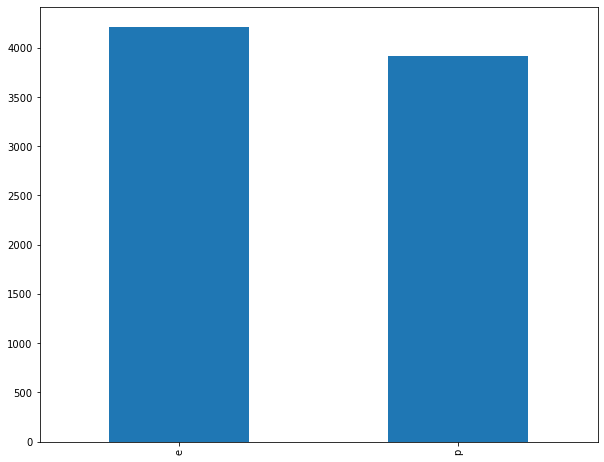

In [5]:
plt.figure(figsize=(10, 8))
df['class'].value_counts().plot(kind='bar', stacked=True);

In [6]:
df.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [7]:
dummies=pd.get_dummies(df, drop_first=True)
dummies.shape

(8124, 96)

In [8]:
df_mod = pd.concat([df, dummies], axis=1)

In [9]:
dummy_cols = ['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat']

In [10]:
df_mod.drop(dummy_cols, axis=1, inplace=True)
df_mod.shape

(8124, 96)

In [11]:
df_mod

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


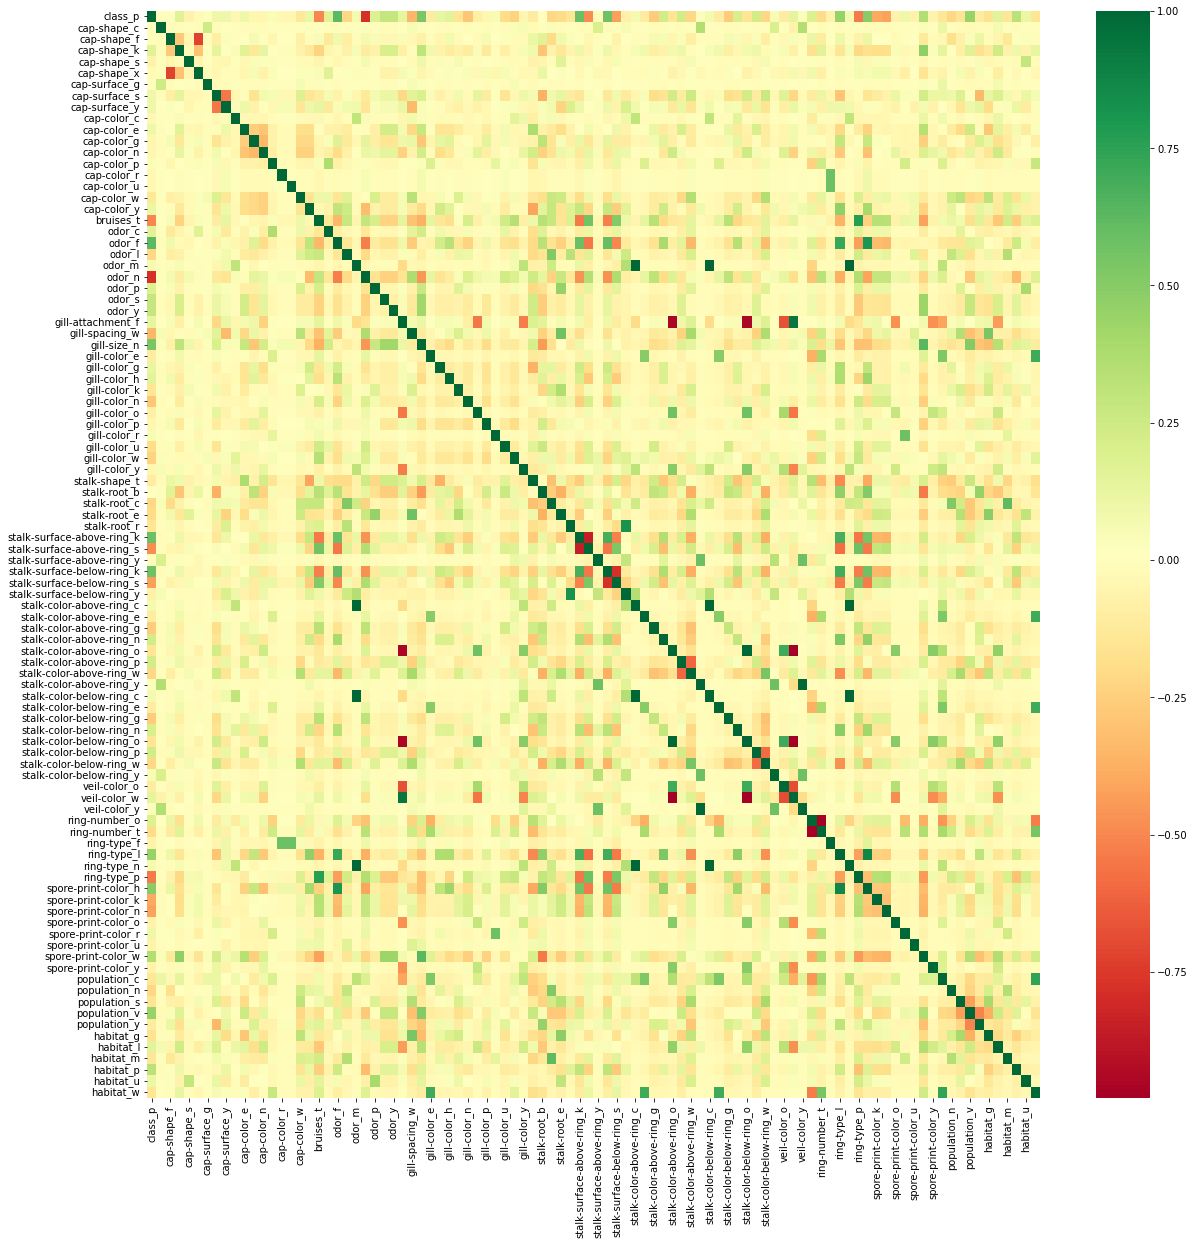

In [12]:
plt.figure(figsize=(20, 20))
sns.heatmap(df_mod.corr(), cmap='RdYlGn')
plt.show()

In [26]:
poison_column_mod = ['odor_f', 'gill-size_n', 'stalk-surface-above-ring_k', 'stalk-surface-below-ring_k', 'ring-type_l', 'spore-print-color_h', 'spore-print-color_w',
                    'population_v']
poison_column = ['odor', 'gill-size', 'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type', 'spore-print-color', 'spore-print-color',
                    'population']

Text(0.5, 1.0, 'Bruises')

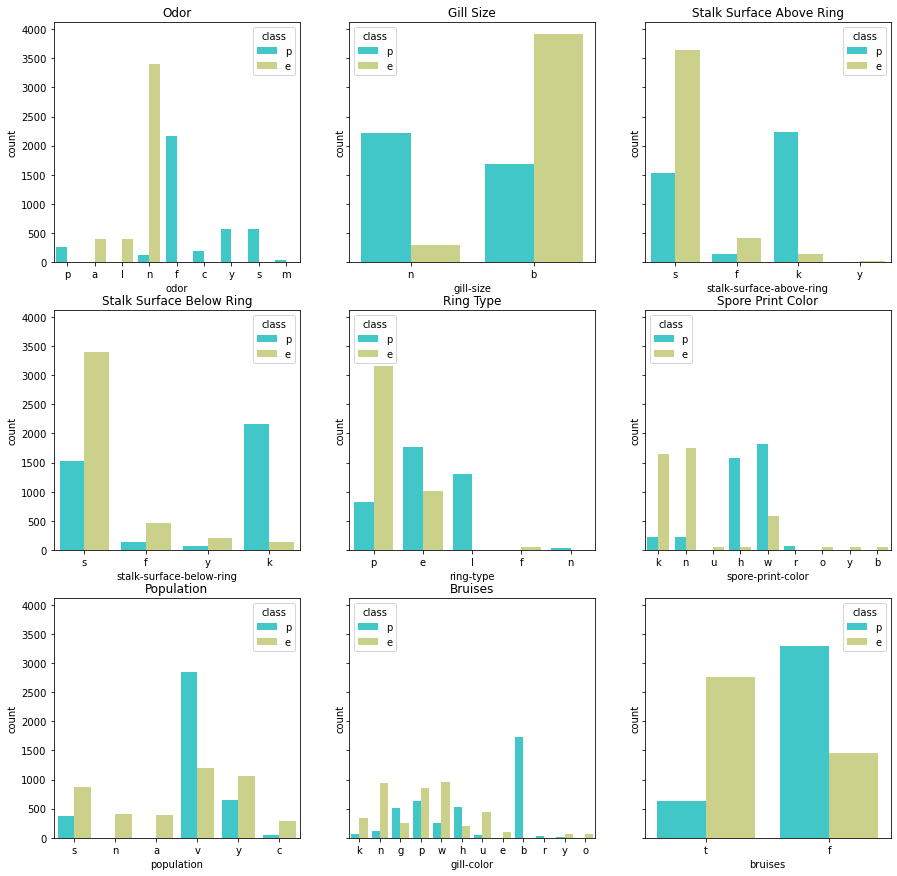

In [86]:
fig, axes = plt.subplots(3, 3, figsize=(15, 15), sharey=True)

sns.countplot(ax=axes[0, 0], data=df, x="odor", hue = 'class', palette="rainbow")
axes[0, 0].set_title('Odor')

sns.countplot(ax=axes[0, 1], x="gill-size", hue = 'class', palette="rainbow", data=df)
axes[0, 1].set_title('Gill Size')

sns.countplot(ax=axes[0, 2], x="stalk-surface-above-ring", hue = 'class', palette="rainbow", data=df)
axes[0, 2].set_title('Stalk Surface Above Ring')

sns.countplot(ax=axes[1, 0], x="stalk-surface-below-ring", hue = 'class', palette="rainbow", data=df)
axes[1, 0].set_title('Stalk Surface Below Ring')

sns.countplot(ax=axes[1, 1], x="ring-type", hue = 'class', palette="rainbow", data=df)
axes[1, 1].set_title('Ring Type')

sns.countplot(ax=axes[1, 2], x="spore-print-color", hue = 'class', palette="rainbow", data=df)
axes[1, 2].set_title('Spore Print Color')

sns.countplot(ax=axes[2, 0], x="population", hue = 'class', palette="rainbow", data=df)
axes[2, 0].set_title('Population')

sns.countplot(ax=axes[2, 1], x="gill-color", hue = 'class', palette="rainbow", data=df)
axes[2, 1].set_title('Gill Color')

sns.countplot(ax=axes[2, 2], x="bruises", hue = 'class', palette="rainbow", data=df)
axes[2, 1].set_title('Bruises')


#### Which mushrooms are poisonous?
- Shrooms with foul oder are, while mushrooms with no oder are least poisonous
- Narrow gill size means likely poisonous
- Silky above and below ring
- Large ring type is while evanescent is likely to be
- White and Chocolate spore color
- Soliraty population
- Blue gill color
- No bruises is likely

<AxesSubplot:xlabel='habitat', ylabel='count'>

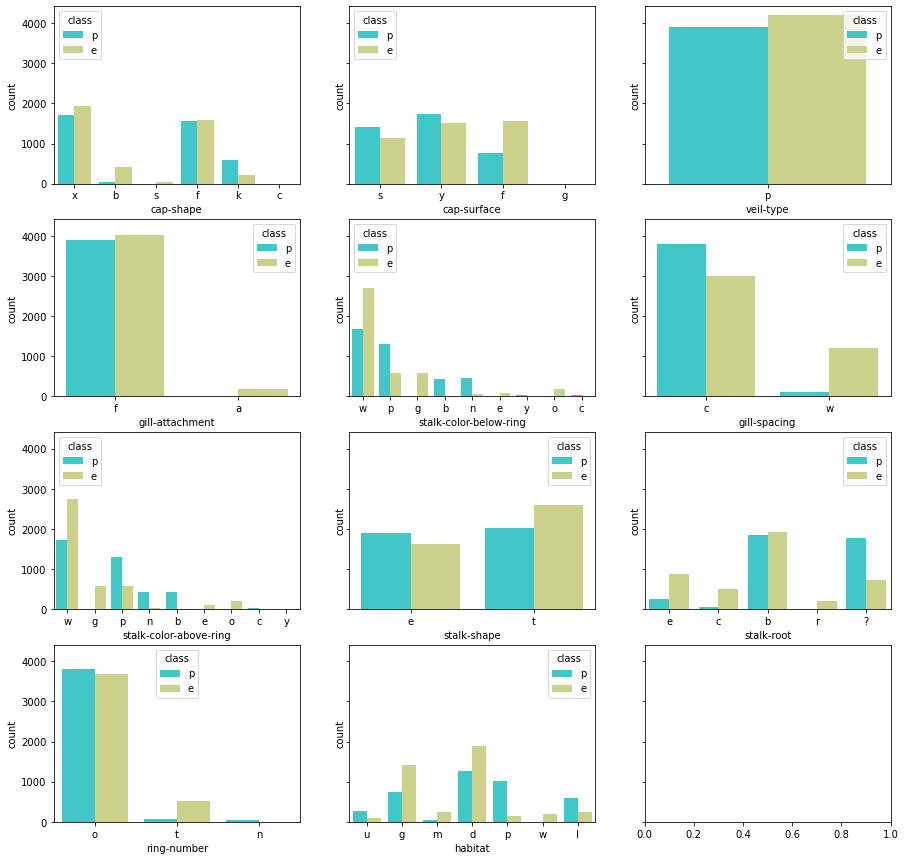

In [90]:
fig, axes = plt.subplots(4, 3, figsize=(15, 15), sharey=True)

sns.countplot(ax=axes[0, 0], data=df, x='cap-shape', hue = 'class', palette="rainbow")

sns.countplot(ax=axes[0, 1], x='cap-surface', hue = 'class', palette="rainbow", data=df)

sns.countplot(ax=axes[0, 2], x='veil-type', hue = 'class', palette="rainbow", data=df)

sns.countplot(ax=axes[1, 0], x='gill-attachment', hue = 'class', palette="rainbow", data=df)

sns.countplot(ax=axes[1, 1], x='stalk-color-below-ring', hue = 'class', palette="rainbow", data=df)

sns.countplot(ax=axes[1, 2], x='gill-spacing', hue = 'class', palette="rainbow", data=df)

sns.countplot(ax=axes[2, 0], x='stalk-color-above-ring', hue = 'class', palette="rainbow", data=df)

sns.countplot(ax=axes[2, 1], x='stalk-shape', hue = 'class', palette="rainbow", data=df)

sns.countplot(ax=axes[2, 2], x='stalk-root', hue = 'class', palette="rainbow", data=df)

sns.countplot(ax=axes[3, 0], x='ring-number', hue = 'class', palette="rainbow", data=df)

sns.countplot(ax=axes[3, 1], x='habitat', hue = 'class', palette="rainbow", data=df)

### On the other columns there are no strong factors showing which attribute mean poisonous shroom or not

In [95]:
df_le = df.copy()

In [98]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
for col in df_le.columns:
    df_le[col] = labelencoder.fit_transform(df_le[col])

In [101]:
df_mod

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8120,0,0,0,0,0,1,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
8121,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
8122,1,0,0,1,0,0,0,0,1,0,...,0,0,1,0,0,1,0,0,0,0


In [104]:
X = df_mod.iloc[:, 1:96]
y = df_mod.iloc[:, 0]

In [106]:
pca = PCA()
pca.fit_transform(X)

array([[-1.42096945e+00,  4.51905341e-01,  7.89332285e-01, ...,
        -4.57142334e-17,  7.67810801e-19, -2.49497643e-17],
       [-1.25179500e+00, -2.76996859e-01,  1.06968942e+00, ...,
        -2.39319119e-16,  7.58250724e-17, -7.68811417e-17],
       [-1.46209849e+00, -1.03640793e-01,  7.50633386e-01, ...,
        -4.36935156e-17, -5.24772051e-18,  2.81232572e-18],
       ...,
       [-6.91107702e-01,  1.48853435e-01, -2.65301990e-01, ...,
         6.84857607e-18, -1.99460016e-17, -6.03552827e-18],
       [ 4.29855119e-01,  1.86325812e+00, -1.77848535e-01, ...,
         5.43047101e-18, -7.30391096e-18,  2.33396561e-18],
       [-6.64299191e-01,  1.81713346e-01, -1.27931039e-01, ...,
        -1.53225507e-17,  2.46246323e-17, -1.83354993e-19]])

In [107]:
covariance = pca.get_covariance()

In [109]:
explained_variance = pca.explained_variance_
explained_variance

array([1.60037860e+00, 1.02010832e+00, 8.30093605e-01, 4.71963891e-01,
       3.97901484e-01, 3.66901109e-01, 3.32050305e-01, 2.90959652e-01,
       2.36139170e-01, 2.29672708e-01, 2.02110842e-01, 1.97583394e-01,
       1.75085737e-01, 1.63914873e-01, 1.60367150e-01, 1.55317630e-01,
       1.42641910e-01, 1.36616825e-01, 1.24138362e-01, 1.17454487e-01,
       1.09842366e-01, 1.01920401e-01, 9.65951033e-02, 9.41034548e-02,
       9.08617851e-02, 8.68580066e-02, 8.07549724e-02, 7.98214487e-02,
       7.61801837e-02, 7.09097624e-02, 6.49554789e-02, 6.07099493e-02,
       5.75287019e-02, 5.11131744e-02, 4.83978994e-02, 4.67538423e-02,
       4.12591179e-02, 3.89283251e-02, 3.80268840e-02, 3.70474430e-02,
       3.19370278e-02, 2.98886948e-02, 2.64732193e-02, 2.49561591e-02,
       2.17299763e-02, 2.05357387e-02, 1.62618949e-02, 1.38683464e-02,
       1.19130734e-02, 1.14897942e-02, 1.08301587e-02, 1.06728096e-02,
       9.41088928e-03, 8.97643226e-03, 8.59723761e-03, 8.38656872e-03,
      

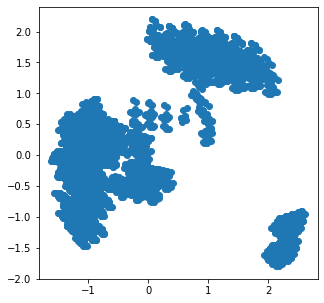

In [121]:
N=df_mod.values
pca = PCA(n_components=2)
x = pca.fit_transform(N)
plt.figure(figsize=(5, 5))
plt.scatter(x[:, 0], x[:, 1])
plt.show()

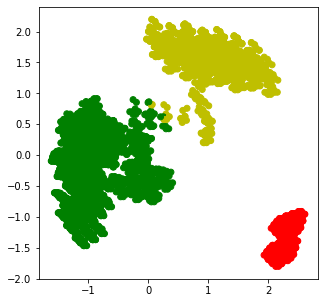

In [128]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=5)
X_clustered = kmeans.fit_predict(N)

LABEL_COLOR_MAP = {0 : 'g', 1 : 'y', 2 : 'r'}

label_color = [LABEL_COLOR_MAP[l] for l in X_clustered]
plt.figure(figsize=(5,5))
plt.scatter(x[:, 0], x[:, 1], c=label_color)
plt.show()


In [129]:
pca_modified = PCA(n_components=15)
pca_modified.fit_transform(X)

array([[-1.42097119,  0.45190981,  0.78935016, ...,  0.50759246,
         0.13126194, -0.36681108],
       [-1.25179492, -0.27700712,  1.06968532, ..., -0.36044592,
         0.16061222, -0.07068976],
       [-1.46209667, -0.10366615,  0.75060021, ...,  0.11450622,
         0.01463605, -0.29273942],
       ...,
       [-0.69110856,  0.14885627, -0.26529476, ...,  0.56163739,
        -0.51104943,  0.5389002 ],
       [ 0.42985292,  1.86326743, -0.17781917, ...,  0.17407907,
        -0.07072893,  0.27615913],
       [-0.6642977 ,  0.18172211, -0.12790778, ...,  0.40276242,
        -0.41127552,  0.61644798]])

In [130]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

# Logistic Regression

In [131]:
from sklearn.linear_model import LogisticRegression
model_LR = LogisticRegression()

In [132]:
model_LR.fit(X_train, y_train)

LogisticRegression()

In [133]:
y_prob = model_LR.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
model_LR.score(X_test, y_pred)

1.0

In [134]:
auc_roc = metrics.roc_auc_score(y_test, y_pred)

In [136]:
auc_roc

1.0

In [138]:
false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, y_prob)
roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

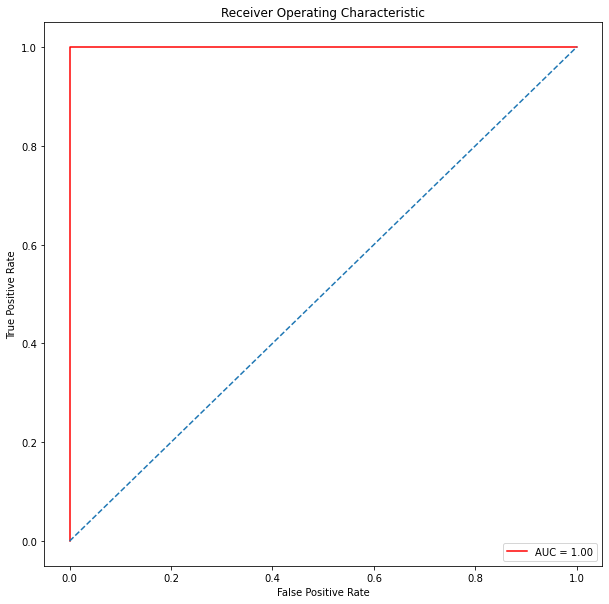

In [139]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Tuned Logistic Regression

In [140]:
LR_model = LogisticRegression()

tuned_parameters = {'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty' : ['l1', 'l2']}

In [141]:
from sklearn.model_selection import GridSearchCV

LR = GridSearchCV(LR_model, tuned_parameters, cv=10)

In [142]:
LR.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']})

In [143]:
print(LR.best_params_)

{'C': 10, 'penalty': 'l2'}


In [150]:
LR_ridge = LogisticRegression(penalty='l2', C=10)
LR_ridge.fit(X_train, y_train)

LogisticRegression(C=10)

In [151]:
y_prob = LR_ridge.predict_proba(X_test)[:, 1]
y_pred = np.where(y_prob > 0.5, 1, 0)
LR_ridge.score(X_test, y_pred)

1.0

In [152]:
auc_roc = metrics.classification_report(y_test, y_pred)
auc_roc

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       845\n           1       1.00      1.00      1.00       780\n\n    accuracy                           1.00      1625\n   macro avg       1.00      1.00      1.00      1625\nweighted avg       1.00      1.00      1.00      1625\n'

In [153]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

1.0

Text(0.5, 0, 'False Positive Rate')

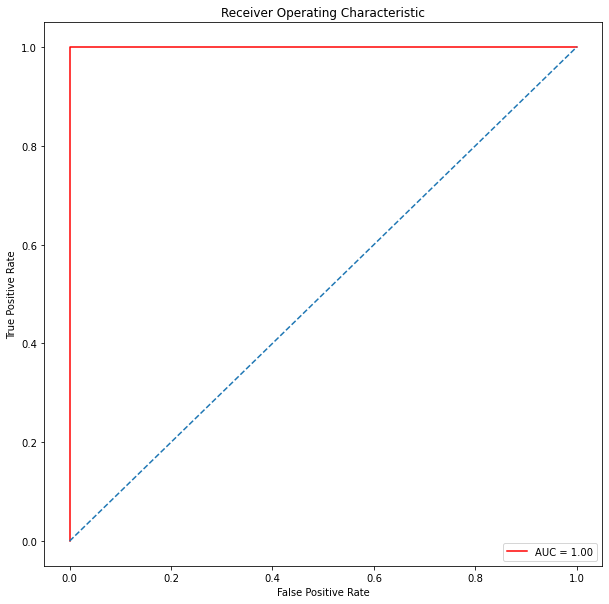

In [154]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')